In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [297]:
df1 = pd.read_csv("C:\\Users\\PAGALAVAN SELVAM\\Downloads\\electric_vehicle_charging_station_list.csv")
df1.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [298]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [299]:
df2 = pd.read_csv("C:\\Users\\PAGALAVAN SELVAM\\Downloads\\EV Stats-1.csv")
df2.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [300]:
df3 = pd.read_csv("C:\\Users\\PAGALAVAN SELVAM\\Downloads\\ev.data.csv")
df3.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [301]:
df3['inr'] = df3['PriceEuro']*0.08320
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [302]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (202, 9)
DF2 Shape:  (30, 10)
DF3 Shape:  (103, 16)


In [303]:
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())
     

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                 

In [304]:
df2.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [305]:
df2=df2.dropna()

In [306]:
df2.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [307]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


'<<< DATASET 2 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


'<<< DATASET 3 >>>'

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,4643.522050
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,2840.004151
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1674.732800
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,2864.534400
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,3744.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5408.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,17888.000000


<AxesSubplot:title={'center':'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

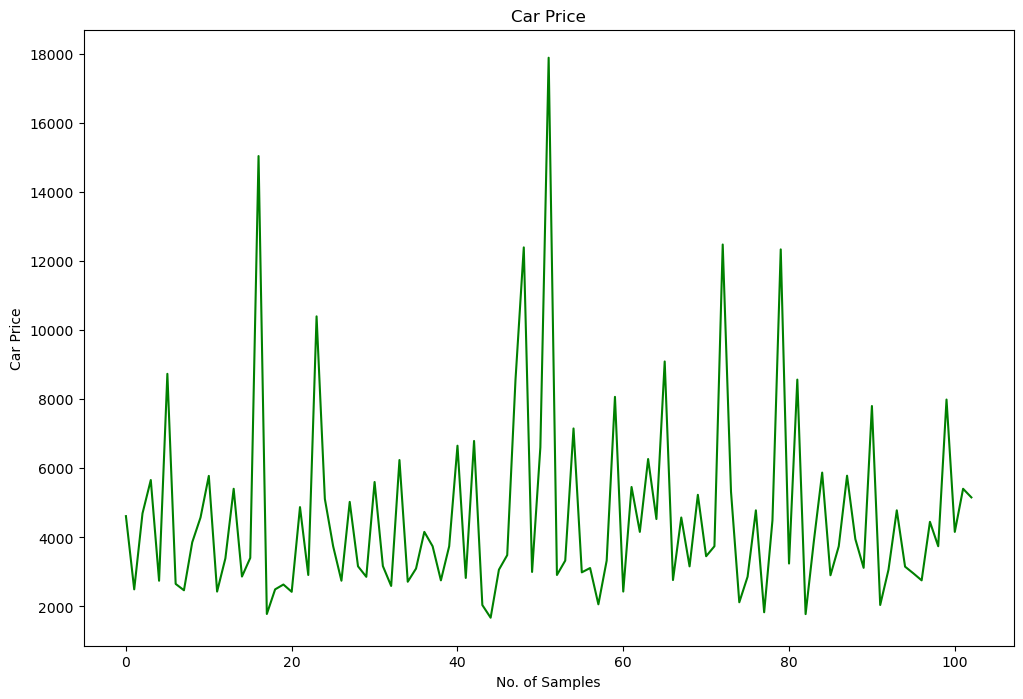

In [308]:
df3['inr'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'green')

In [309]:
import seaborn as sb

<AxesSubplot:>

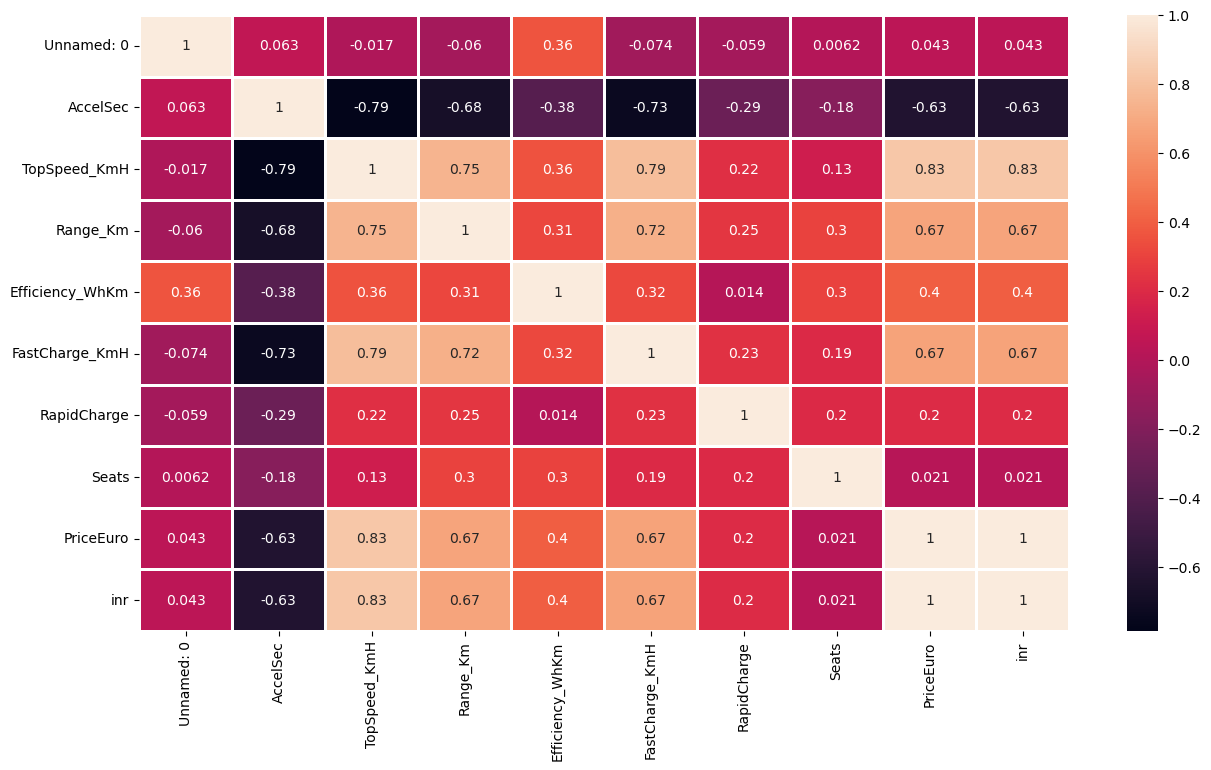

In [310]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df3.corr(),linewidths=1,linecolor='white',annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

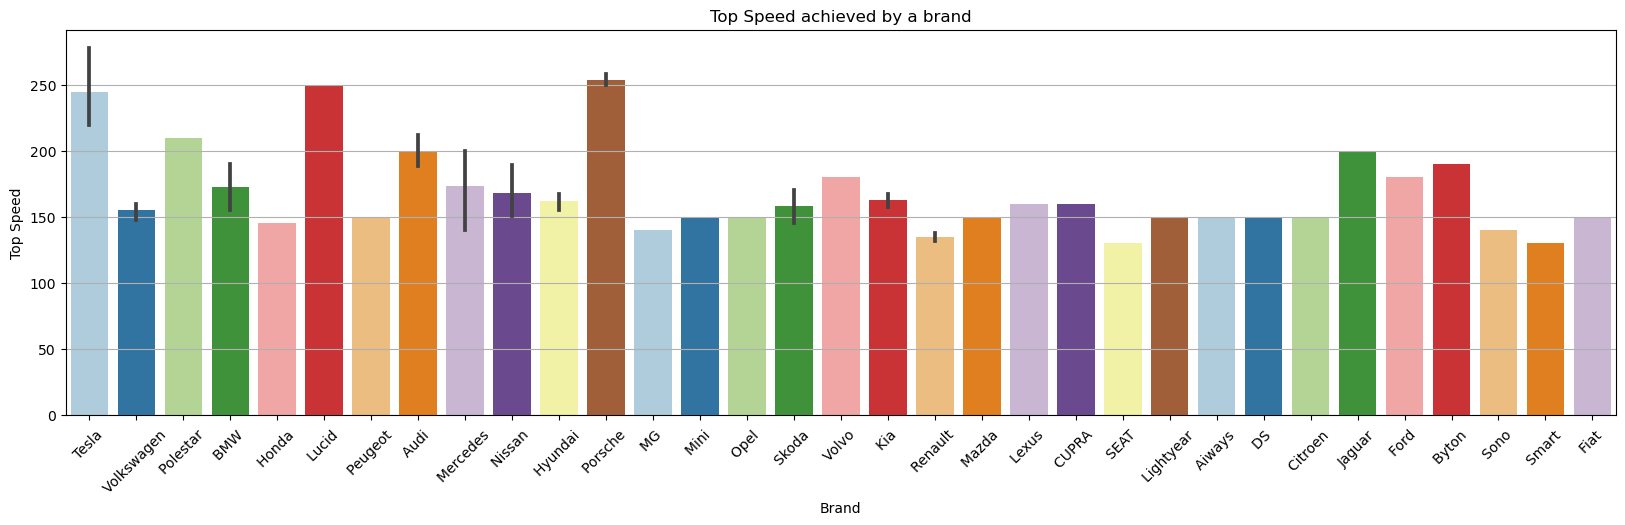

In [311]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df3,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

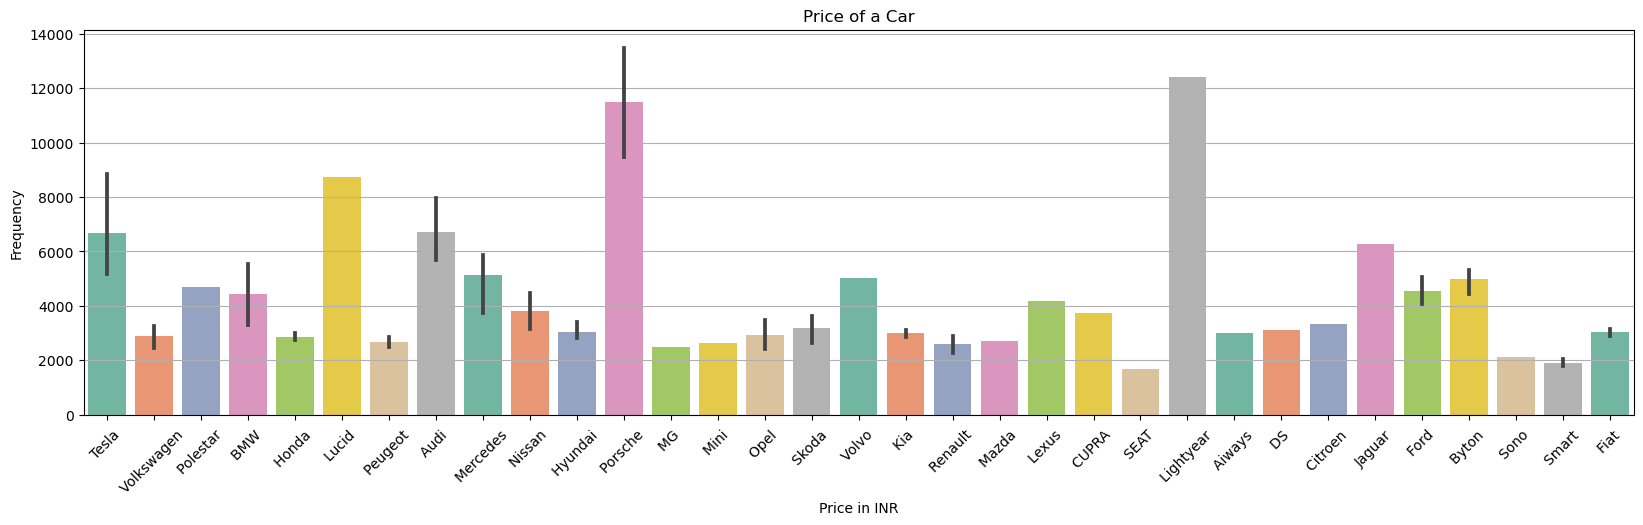

In [312]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr',data=df3,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Body Style')

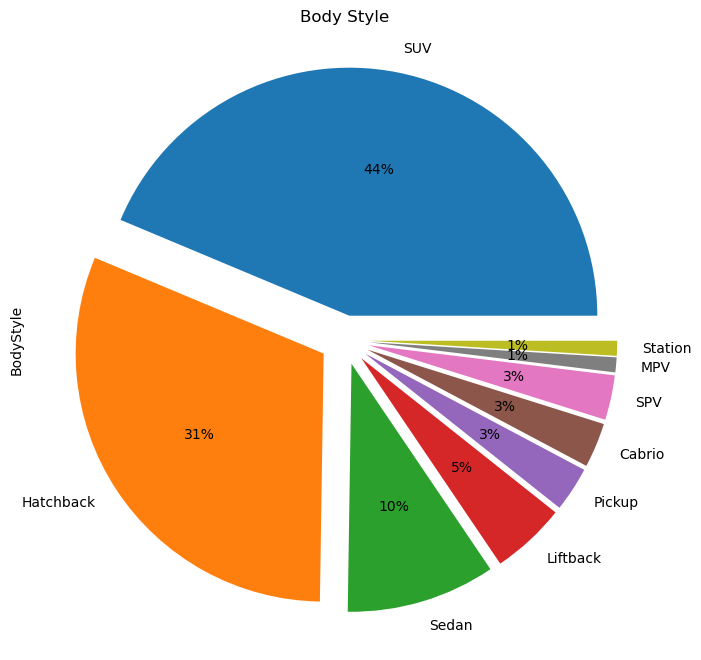

In [313]:
df3['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

In [314]:
df = df2[df2.columns[:-1]]
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0
1,2,Assam,463,138,1006,0,117,151,0
2,3,Bihar,252,430,2148,6,64,271,0
3,4,Chhattisgarh,613,382,2078,58,106,997,0
4,5,Delhi,1395,251,5018,0,1,12695,21


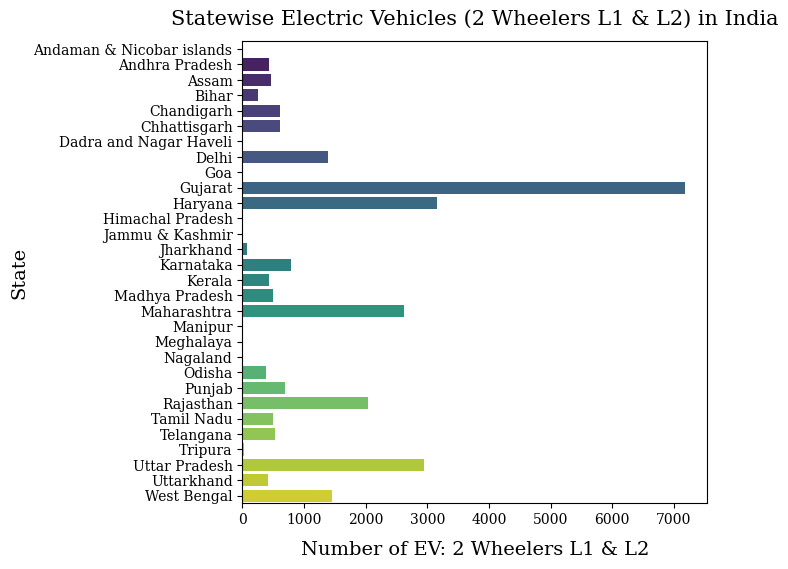

In [315]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers L1 & L2', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers L1 & L2) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

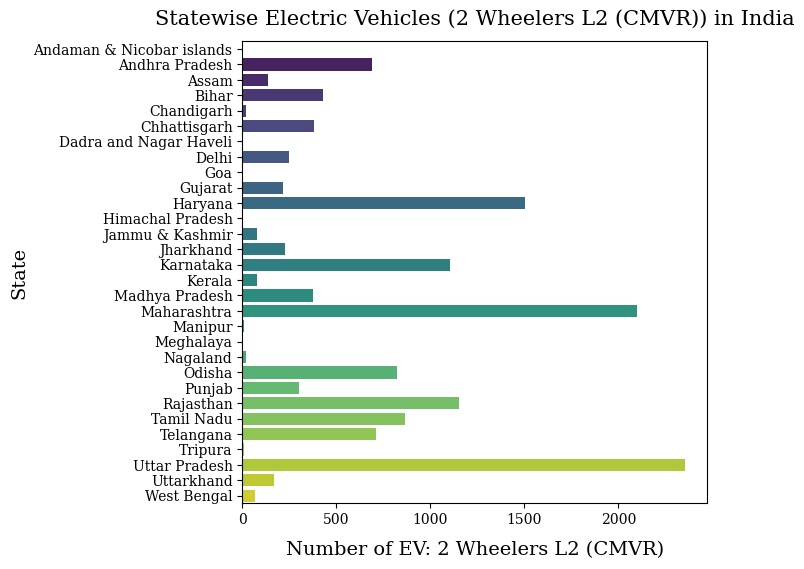

In [316]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Two Wheelers (Category L2 (CMVR))', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers L2 (CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers L2 (CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

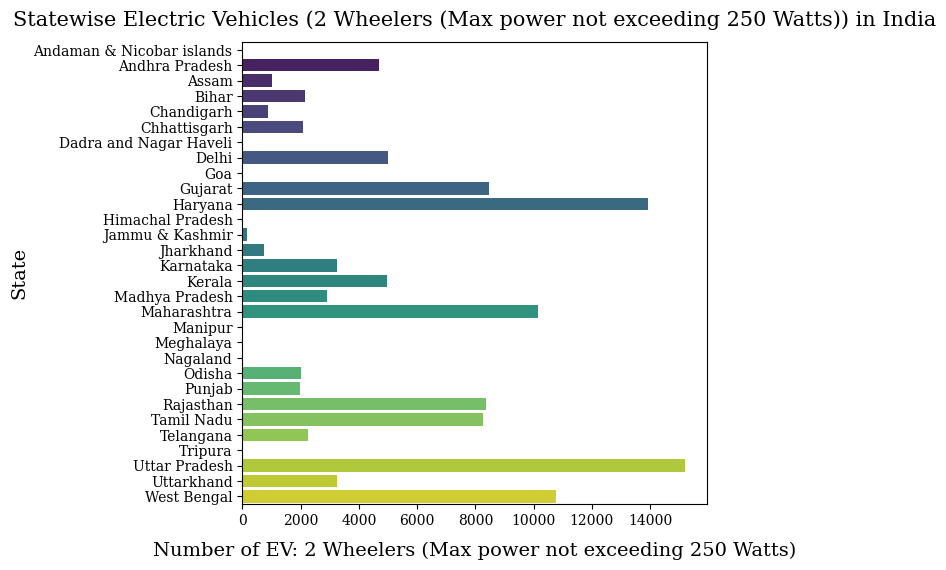

In [317]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Two Wheelers (Max power not exceeding 250 Watts)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers (Max power not exceeding 250 Watts)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers (Max power not exceeding 250 Watts)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

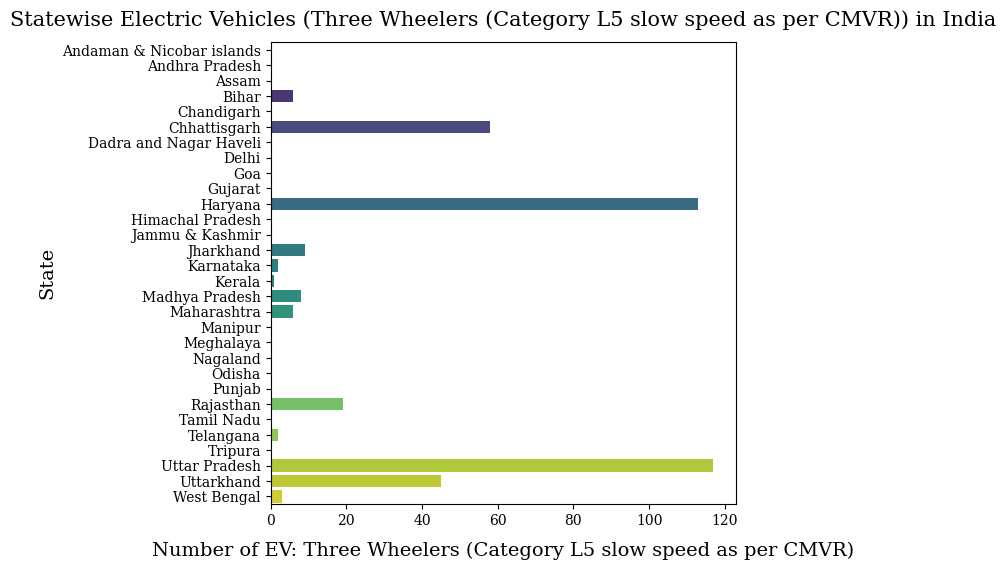

In [318]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Three Wheelers (Category L5 slow speed as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Three Wheelers (Category L5 slow speed as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

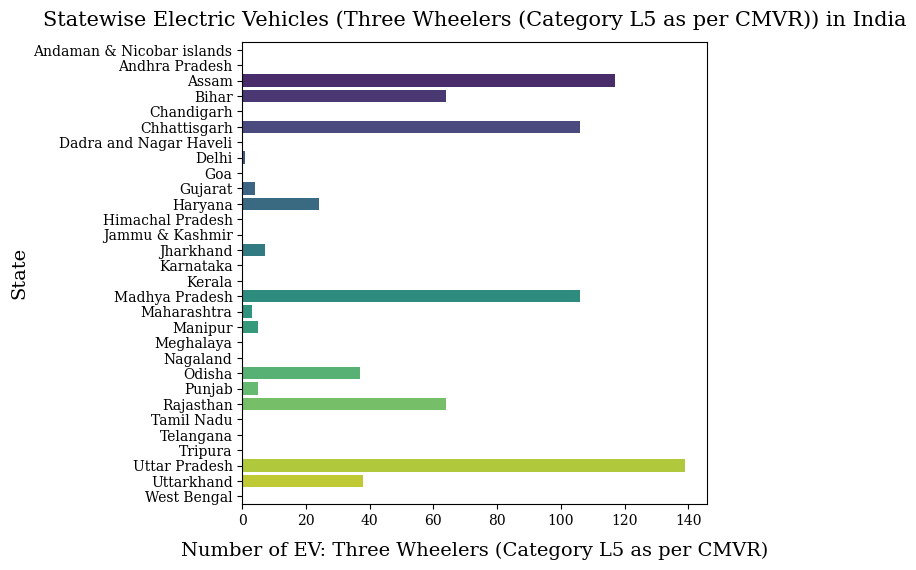

In [319]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Three Wheelers (Category L5 as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Three Wheelers (Category L5 as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

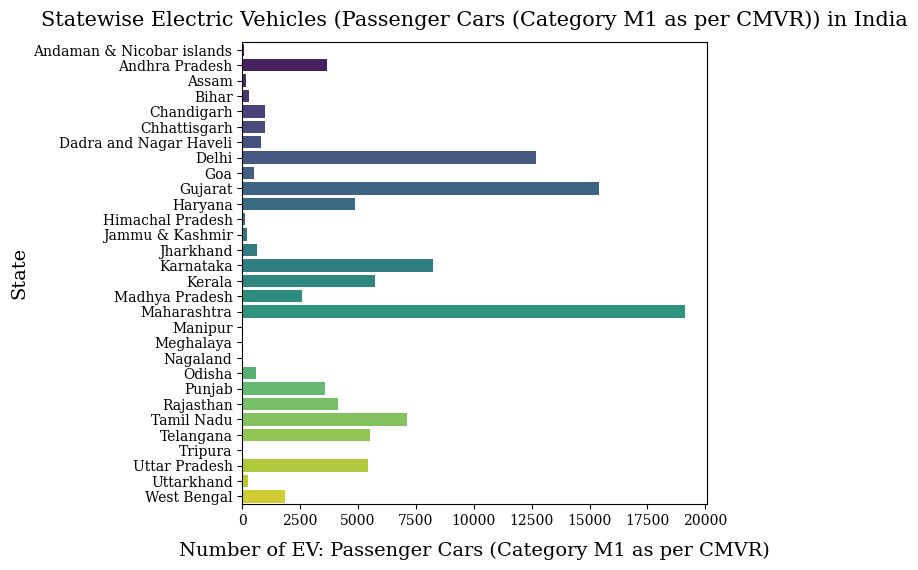

In [320]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Passenger Cars (Category M1 as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Passenger Cars (Category M1 as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

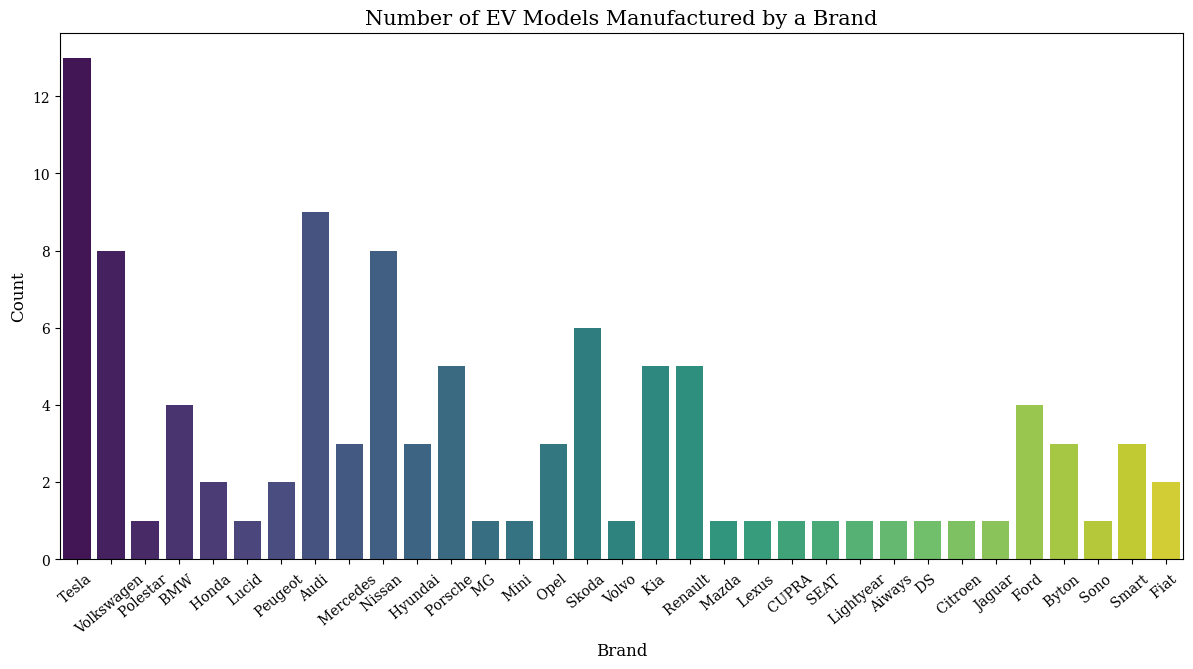

In [321]:
sns.catplot(data=df3, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

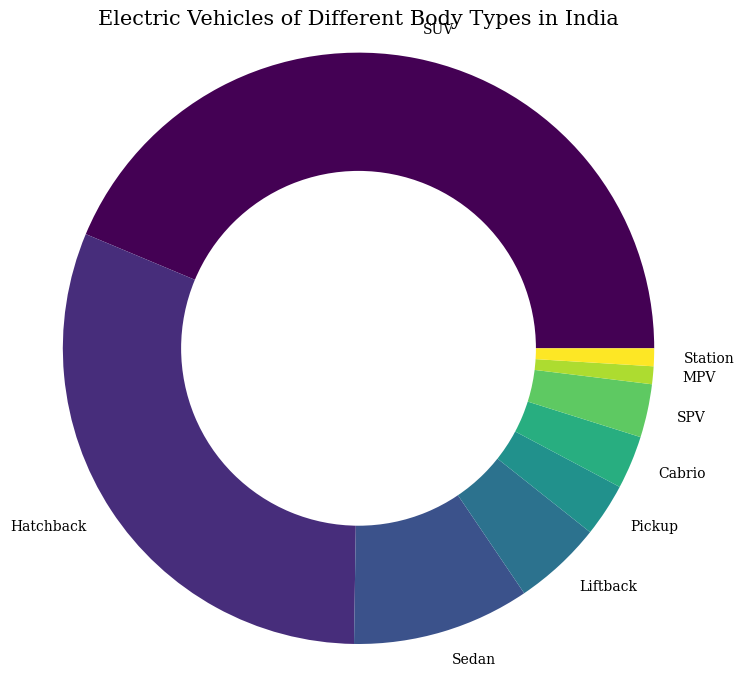

In [322]:
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

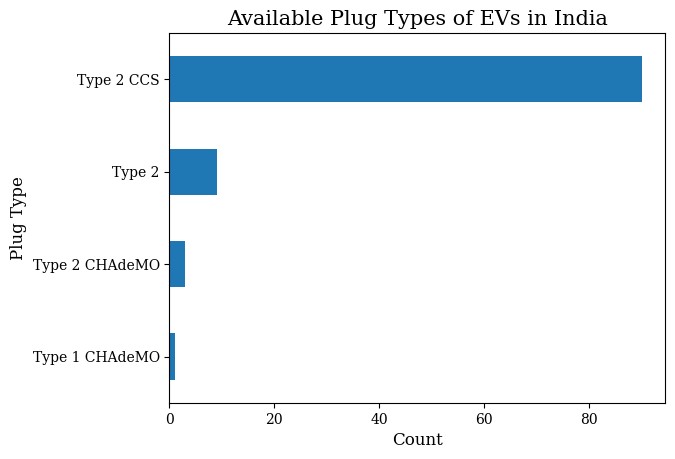

In [323]:
df3['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

In [324]:
df5= df3[["TopSpeed_KmH", "inr"]].groupby("TopSpeed_KmH").count()
df6= df3[["Range_Km", "inr"]].groupby("Range_Km").count()
df7= df3[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df7.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


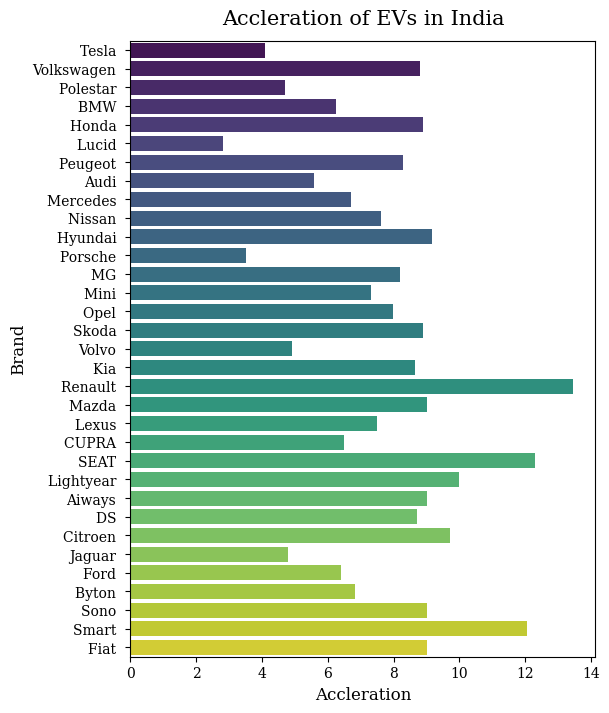

In [325]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

In [326]:
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

In [327]:
x=df3[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df3['inr']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [329]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [330]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [331]:
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

In [332]:
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232661


In [333]:
y1=df3[['RapidCharge']]
x1=df3[['inr']]

In [334]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [335]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [336]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]], dtype=int64)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

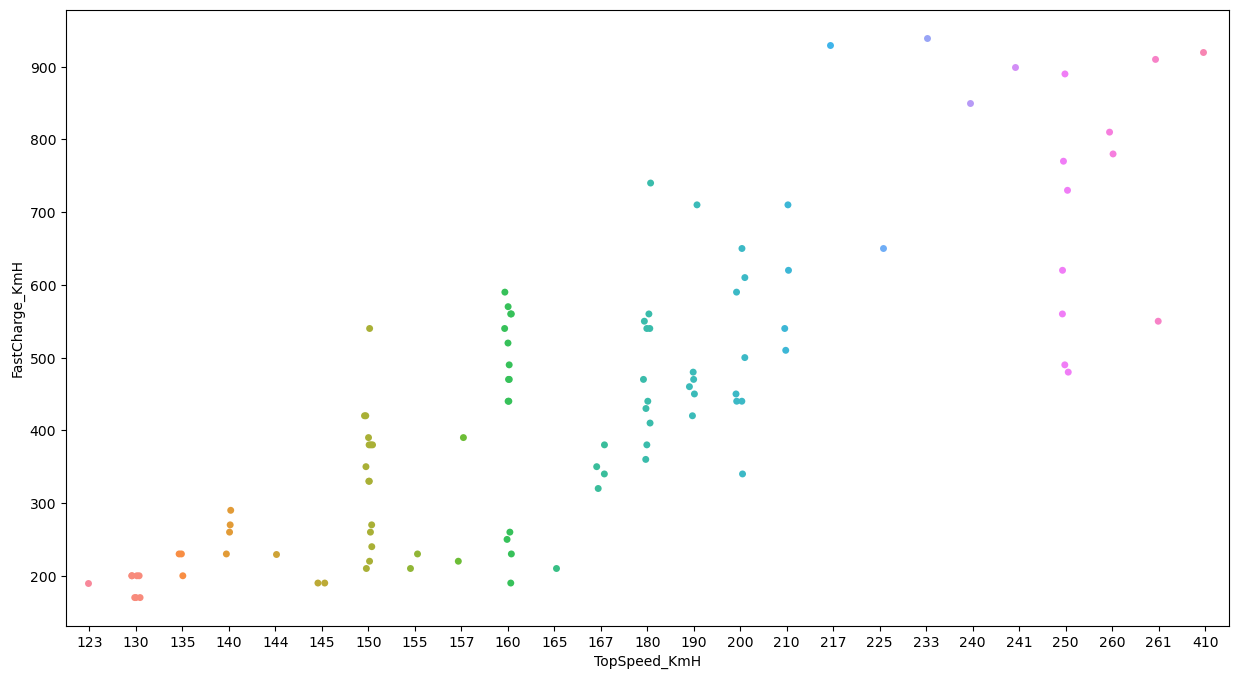

In [337]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df3, jitter=True)

In [338]:
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
     

In [339]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [340]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


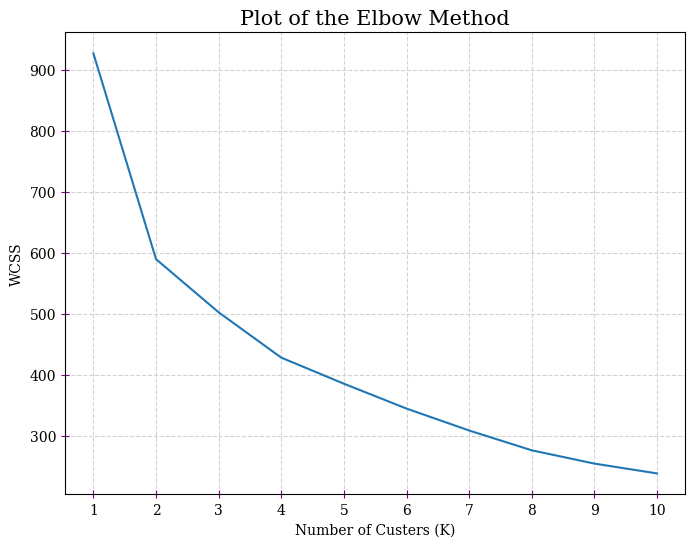

In [341]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [342]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [343]:
print(kmean.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [344]:
pd.Series(kmean.labels_).value_counts()
     

1    39
2    32
3    19
0    13
dtype: int64

In [345]:
df3['clusters'] = kmean.labels_

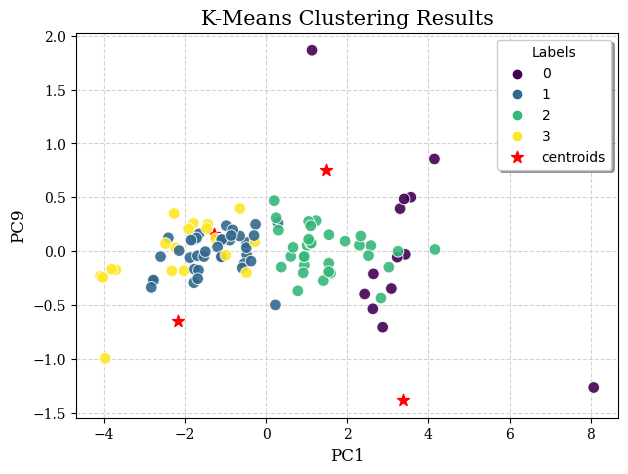

In [346]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [347]:
X=df_pca[['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9']]
y=df3['inr']

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [349]:
print(lm.intercept_)

4643.522050485438


In [350]:
lm.coef_

array([ 1101.5872075 ,  -741.20904198,   208.53617452,   508.32245827,
         122.35330123,  1579.00685826,   333.61147115, -1079.99511501,
        1461.7226913 ])

In [351]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [352]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1101.587208
PC2,-741.209042
PC3,208.536175
PC4,508.322458
PC5,122.353301
PC6,1579.006858
PC7,333.611471
PC8,-1079.995115
PC9,1461.722691


In [353]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [354]:
y_test

37     3744.0000
1      2496.0000
69     5233.2800
80     3243.7184
92     3064.8384
61     5459.5840
85     2903.6800
53     3328.0000
88     3952.0000
32     2594.5088
6      2654.0800
71     3744.0000
43     2041.2288
16    15040.9792
50     6609.8240
31     3170.3360
97     4451.2000
14     2866.9888
25     3744.0000
51    17888.0000
21     4877.1840
3      5660.9280
84     5876.4992
57     2062.5280
48    12396.8000
47     8565.0240
79    12338.6432
58     3328.0000
2      4695.8080
13     5408.0000
45     3064.8384
89     3120.0000
41     2826.3872
23    10400.0000
26     2745.6000
22     2912.0000
94     3153.2800
27     5028.3584
20     2424.9472
66     2766.0672
30     5604.1856
35     3098.1184
Name: inr, dtype: float64

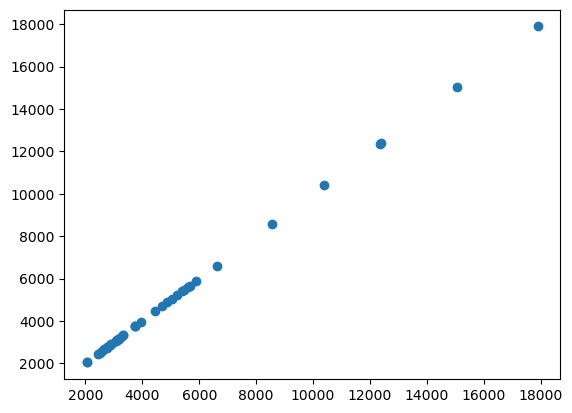

In [355]:
plt.scatter(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inr', ylabel='Density'>

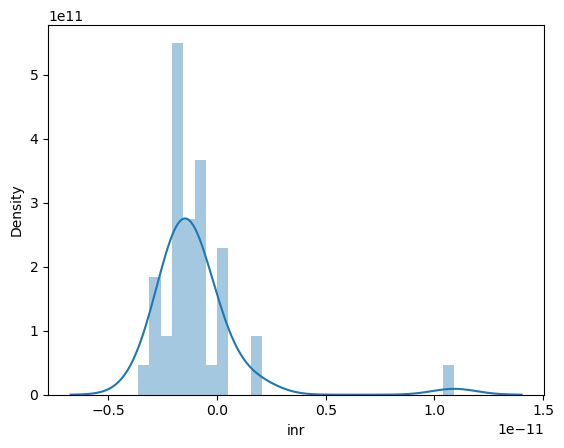

In [356]:
sb.distplot((y_test-predictions))

In [357]:
from sklearn import metrics

In [358]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.710716224763365e-12
MSE: 5.64255346420101e-24
RMSE: 2.3754059577682736e-12


In [359]:
metrics.mean_absolute_error(y_test,predictions)

1.710716224763365e-12

In [360]:
metrics.mean_squared_error(y_test,predictions)

5.64255346420101e-24

In [361]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.3754059577682736e-12